In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Read the dataset

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### Check the classes

We have 2 classes.

In [3]:
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

## Separate two classes

In [4]:
dfs = [x for _, x in df.groupby('Class')]
df0 = dfs[1].reset_index(drop=True)
df1 = dfs[0].drop(columns=["Class"]).reset_index(drop=True)

In [5]:
df0.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### Assign class  number to each class

In [6]:
df0["Class"] = 0
df1["Class"] = 1

# Prepare train and test sets

80\% in train and 20\% in test

In [7]:
train_df0 = df0.iloc[0: int(len(df0)*0.8)]
train_df1 = df1.iloc[0: int(len(df1)*0.8)]

In [8]:
X_train_data = pd.concat([train_df0.drop(columns=["Class"]), train_df1.drop(columns=["Class"])]).reset_index(drop=True)
X_train_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
715,56244,398.802452,182.844046,0.888703,58530,0.656366,1008.134
716,142239,614.834478,297.735347,0.874928,148078,0.643516,1553.114
717,78632,407.940329,245.821198,0.798050,79715,0.689011,1068.727
718,93430,467.637119,258.947168,0.832693,98337,0.712988,1258.966


In [9]:
y_train = pd.concat([train_df0["Class"], train_df1["Class"]]).to_numpy()
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
test_df0 = df0.iloc[int(len(df0)*0.8):]
test_df1 = df1.iloc[int(len(df1)*0.8):]

In [11]:
X_test_data = pd.concat([test_df0.drop(columns=["Class"]), test_df1.drop(columns=["Class"])]).reset_index(drop=True)
y_test = pd.concat([test_df0["Class"], test_df1["Class"]]).to_numpy()

# Standardize the dataset

Before preparing the model, the entire dataset need to be standardized. Only train set mean and standard deviation are used to standardize the dataset to avoid potential bias. Each feature/attribute $(X_i)$ is subtracted by its mean $\mu$ and divided by its standard deviation $\sigma$. 

$\mu = \frac{1}{N} * X_i$\
$X_i = (X_i - \mu) / \sigma$

In [12]:
mean_train = X_train_data.mean()
std_train = X_train_data.std()

In [13]:
mean_train

Area               88043.401389
MajorAxisLength      432.215772
MinorAxisLength      254.705362
Eccentricity           0.780984
ConvexArea         91495.638889
Extent                 0.698941
Perimeter           1169.716692
dtype: float64

In [14]:
std_train

Area               38921.340363
MajorAxisLength      117.019632
MinorAxisLength       49.308385
Eccentricity           0.093355
ConvexArea         40763.058741
Extent                 0.054117
Perimeter            274.748746
dtype: float64

In [15]:
X_train_standard = (X_train_data - mean_train)/ std_train
X_train_standard.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.013345,0.085714,-0.028681,0.415126,-0.023297,1.103335,0.052132
1,-0.330857,-0.218127,-0.236733,0.223030,-0.311719,-0.273694,-0.174453
2,0.072264,0.085894,0.235720,0.186058,0.054494,-1.133249,0.141432
3,-1.082065,-1.244878,-0.931795,-1.028276,-1.083325,0.012163,-1.184918
4,-0.221868,-0.683860,0.732577,-2.324163,-0.246121,1.733843,-0.351105


In [16]:
X_train_standard = X_train_standard.to_numpy()
X_train_standard.shape

(720, 7)

In [17]:
X_train = np.hstack([np.ones((X_train_standard.shape[0],1)), X_train_standard]) # add bias term
X_train.shape

(720, 8)

In [18]:
X_test_standard = (X_test_data - mean_train)/ std_train
X_test_standard.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-1.008043,-0.854138,-1.305133,0.413987,-0.972661,-0.694778,-0.879715
1,-1.002134,-1.254607,-0.687215,-1.579456,-0.996408,0.292508,-1.194003
2,-0.600555,-0.577963,-0.525359,-0.025955,-0.588073,-0.796336,-0.633396
3,0.393964,0.243161,0.675094,-0.005231,0.345248,0.517888,0.220261
4,-0.361534,-0.623341,0.174981,-1.078837,-0.396011,1.031061,-0.553115


In [19]:
X_test_standard = X_test_standard.to_numpy()
X_test_standard.shape

(180, 7)

In [20]:
X_test = np.hstack([np.ones((X_test_standard.shape[0],1)), X_test_standard]) # add bias term
X_test.shape

(180, 8)

# Prepare the Logistic Regression algorithm

Steps to follow:

* Initialize the weights
* Make prediction using current weights
* Calculate gradient of the weights and update the weights
* Calculate cost function
* Repeat steps 2-4 until convergence

All of the above steps must be done only for train set. Read bellow cells to understand each step.

## Sigmoid function 
$$sigmoid(x) = \frac {1} {1+exp(-x)} $$

In [21]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Cost Function

 $$ cost = - y*log(\hat{y}) - (1 - y) * log(1-\hat{y}) $$ 

In [22]:
def cost(y_truth, y_proba):
    loss = - y_truth*np.log(y_proba) - (1- y_truth)*np.log(1 - y_proba)
    return loss

## Compute Gradient
For Logistic Regression, the gradient of the weight is :
$$ gradient(w) = (\hat{y} - y)*X $$

In [23]:
def gradient_compute(X, y, y_proba):
    '''
    X: Input Feature Array of NxD shape
    y: ground truth output of N shape
    y_proba: probability of N shape
    '''
    assert y.ndim == 1, "y should be one dimensional"
    return np.dot((y_proba - y), X)

## Probability prediction
$$\hat{y} = sigmoid(w^T . x)$$

In [24]:
def probability(w, X):
    y_proba = np.array([])
    for i in range(len(X)):
        proba = sigmoid(np.dot(w, X[i]))
        y_proba = np.append(y_proba, proba)
    return y_proba

## Label Prediction

After computing necessary parameters, each instance x is tested.

$$ probability = sigmoid(w^T.x) $$

This equation gives the probability between 0 and 1. Then, if it is greater than 0.5, it will be defined as class 1, and if it is less than 0.5, it will be defined as class 0.

In [25]:
def prediction(y_proba):
    y_pred = np.array([], dtype=np.int16)

    for i in range(len(y_proba)):
        if y_proba[i] > 0.5:
            pred = 1
        else:
            pred = 0
        y_pred =np.append(y_pred, pred)
    return y_pred

# Offline Training Gradient Descent

In offline training, we use the entire dataset at every iteration. After one forward pass using the entire training data, the weights get updated.
$$ w = w - learning\_rate*gradient(w) $$

In [26]:
def fit(X, y, epochs=10, learning_rate=0.01):
    N = X.shape[0]                     # number of training samples
    w = np.ones((1, X_train.shape[1])) # initialize the weights
    cost_list = []
    for k in range(epochs):
        y_proba = probability(w, X)
        w = w - learning_rate* gradient_compute(X, y, y_proba) # update the weights after one epoch

        loss = 0
        total_cost = 0
        for i in range(N):
            loss += cost(y[i], y_proba[i])
        total_cost = loss / N
        cost_list.append(total_cost)
    return w, cost_list

## Training

Text(0, 0.5, 'Loss')

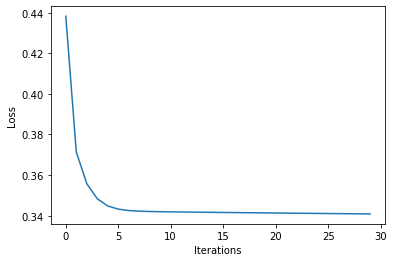

In [62]:
epochs = 30
learning_rate = 0.01
w_offline, cost_list_offline = fit(X_train, y_train, epochs = epochs, learning_rate = learning_rate)
plt.plot(cost_list_offline)
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Mini batch Gradient Descent
In mini batch gradient descent, we create batches of the training data and use one batch at a time. After one forward pass using one batch, the weight gets update. That means, we update the weights more frequently than offline learning. 

In [28]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [29]:
def fit_mini(X, y, batch_size = 10, epochs=10, learning_rate=0.01):
    N = X.shape[0]
    w = np.ones((1, X_train.shape[1]))
    cost_list = []
    number_of_batch = N // batch_size 
    
    for k in range(epochs):
        mini_batches = create_mini_batches(X, y.reshape(len(y),1), batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            y_proba = probability(w, X_mini)
            w = w - learning_rate* gradient_compute(X_mini, np.squeeze(y_mini), y_proba)

            loss = 0
            total_cost = 0
            for i in range(len(y_mini)):
                loss += cost(y_mini[i], y_proba[i])
            total_cost = loss / len(y_mini)
            cost_list.append(total_cost)
    return w, cost_list

## Training

Text(0, 0.5, 'Loss')

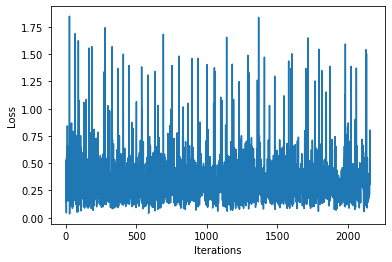

In [63]:
epochs = 30
learning_rate = 0.01
w_mini, cost_list_mini = fit_mini(X_train, y_train, epochs = epochs, learning_rate = learning_rate)
plt.plot(cost_list_mini)
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Evaluation Metrics

The following evaluation metrics are used to evaluate the LDA model:
* accuracy = (TN + TP)/ N
* sensitivity = TP / (TP + FN)
* specificity = TN / (TN + FP)
* precision = TP / (TP + FP)
* f1-score = $2*\frac{precision * sensitivity} {precision + sensitivity}$
* log loss = $- \frac{1}{N} * \sum_{i}^{N} [y_i*ln(p_i) + (1-y_i)*ln(1-p_i)]$

Here,

TP= True Positive\
TN= True Negative\
FP= False Positive\
FN= False Negative\
$y_i$ = ground truth of instance i\
$p_i$ = probability of instance of i

In [31]:
def compute_confusion_matrix(true, pred):
    '''Computes a confusion matrix using numpy.'''

    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

In [32]:
def accuracy(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return (tp+tn)/(tp+tn+fp+fn) 

In [33]:
def sensitivity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp/(tp+fn)   

In [34]:
def specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tn/(tn+fp) 

In [35]:
def precision(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp/(tp+fp) 

In [36]:
def f1_score(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2 * (precision * recall)/(precision + recall)
    return f1_score

In [37]:
def log_loss(ground_truth, y_proba):
    log_loss = -((ground_truth * np.log(y_proba)) + ((1-ground_truth) * np.log(1-y_proba))).mean()
    return log_loss

# Evaluating Offline Model

## Evaluation metrics for train set 

In [38]:
y_train_proba = probability(w_offline, X_train)
y_train_pred = prediction(y_train_proba)

conf_matrix_train = compute_confusion_matrix(y_train, y_train_pred)
conf_matrix_train

array([[322.,  38.],
       [ 52., 308.]])

In [39]:
accuracy(conf_matrix_train)

0.875

In [40]:
sensitivity(conf_matrix_train)

0.8555555555555555

In [41]:
specificity(conf_matrix_train)

0.8944444444444445

In [42]:
f1_score(conf_matrix_train)

0.8725212464589235

In [43]:
log_loss(y_train, y_train_proba)

0.340815509903245

## Evaluation metrics for test set

In [44]:
y_test_proba = probability(w_offline, X_test)
y_test_pred = prediction(y_test_proba)

conf_matrix_test = compute_confusion_matrix(y_test, y_test_pred)
conf_matrix_test

array([[80., 10.],
       [18., 72.]])

In [45]:
accuracy(conf_matrix_test)

0.8444444444444444

In [46]:
sensitivity(conf_matrix_test)

0.8

In [47]:
specificity(conf_matrix_test)

0.8888888888888888

In [48]:
f1_score(conf_matrix_test)

0.8372093023255814

# Evaluating Mini batch Gradient Descent Model

## Evaluation metrics for train set 

In [49]:
y_train_proba = probability(w_mini, X_train)
y_train_pred = prediction(y_train_proba)

conf_matrix_train = compute_confusion_matrix(y_train, y_train_pred)
conf_matrix_train

array([[323.,  37.],
       [ 52., 308.]])

In [50]:
accuracy(conf_matrix_train)

0.8763888888888889

In [51]:
sensitivity(conf_matrix_train)

0.8555555555555555

In [52]:
specificity(conf_matrix_train)

0.8972222222222223

In [53]:
f1_score(conf_matrix_train)

0.8737588652482269

In [54]:
log_loss(y_train, y_train_proba)

0.34085004814112574

## Evaluation metrics for test set

In [55]:
y_test_proba = probability(w_mini, X_test)
y_test_pred = prediction(y_test_proba)

conf_matrix_test = compute_confusion_matrix(y_test, y_test_pred)
conf_matrix_test

array([[80., 10.],
       [18., 72.]])

In [56]:
accuracy(conf_matrix_test)

0.8444444444444444

In [57]:
sensitivity(conf_matrix_test)

0.8

In [58]:
specificity(conf_matrix_test)

0.8888888888888888

In [59]:
f1_score(conf_matrix_test)

0.8372093023255814

In [60]:
log_loss(y_test, y_test_proba)

0.4099919925046505

In [61]:
log_loss(y_test, y_test_proba)

0.4099919925046505